In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("train_set.csv")

In [ ]:
data.head()

In [ ]:
data.nunique()

In [ ]:
data.describe()

In [ ]:
data.isnull().sum() # check missing values

In [ ]:
# fill missing values with the - mean (numerical)

data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].mean())

data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean())

data["Credit_History"] = data["Credit_History"].fillna(data["Credit_History"].mean())



In [ ]:
# fill missValue for - mode  (categorical) 
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])



In [ ]:
data.isnull().sum() 

In [ ]:
sns.countplot(data['Gender'])

In [ ]:
sns.countplot(data['Married'])

In [ ]:
sns.countplot(data['Dependents'])

In [ ]:
sns.countplot(data['Self_Employed'])

In [ ]:
sns.countplot(data['Loan_Status'])

In [ ]:
# create a new column appIncome + CoappIncome = total_income


data["total_income"] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()


## Log transformation 

In [ ]:
 sns.distplot(data['ApplicantIncome'])

In [ ]:
# not normally disterbute ---> normlaize the data by apply log transformation  

# data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
# sns.distplot(data['ApplicantIncome'])

In [ ]:
#  sns.distplot(data['CoapplicantIncome'])

In [ ]:
# data['CoapplicantIncome'] = np.log(data['CoapplicantIncome']) 

# sns.distplot(data['CoapplicantIncome'])

In [ ]:
data['LoanAmount'] = np.log(data['LoanAmount']) 

sns.distplot(data['LoanAmount'])

In [ ]:
data['Loan_Amount_Term'] = np.log(data['Loan_Amount_Term']) 

sns.distplot(data['Loan_Amount_Term'])


/Users/alwaleedalattas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_income', ylabel='Density'>

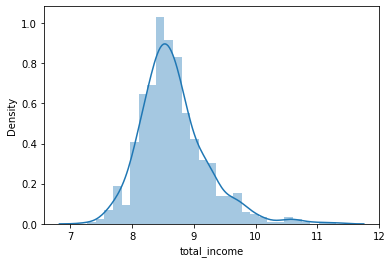

In [104]:
sns.distplot(data['total_income'])

/Users/alwaleedalattas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_income', ylabel='Density'>

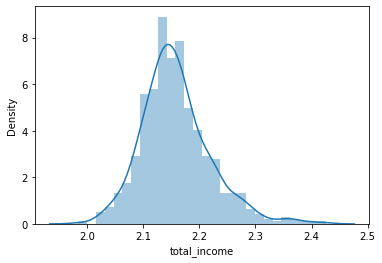

In [105]:
data['total_income'] = np.log(data['total_income']) 

sns.distplot(data['total_income'])


## Coorelation Matrix

In [ ]:
corr = data.corr()
sns.heatmap(corr , annot=True)

In [109]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,1,0,0,0,0,4.986426,5.886104,1.0,2,1,2.160333
1,1,1,1,0,0,4.852030,5.886104,1.0,0,0,2.164996
2,1,1,0,0,1,4.189655,5.886104,1.0,2,1,2.080237
3,1,1,0,1,0,4.787492,5.886104,1.0,2,1,2.140692
4,1,0,0,0,0,4.948760,5.886104,1.0,2,1,2.163267


In [ ]:
data.isnull().sum() # check missing values

In [108]:
cols_drop = ['Loan_ID', 'CoapplicantIncome', 'ApplicantIncome']


data = data.drop(cols_drop , axis = 1)



In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
data.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'total_income'],
      dtype='object')

In [112]:
cols = ['Gender' , 'Married' , 'Education' , 'Self_Employed' , 'Property_Area' , 'Loan_Status' , 'Dependents' ]

_ = LabelEncoder()

for col in cols:
    data[col] = _.fit_transform(data[col])
    

In [113]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,1,0,0,0,0,4.986426,5.886104,1.0,2,1,2.160333
1,1,1,1,0,0,4.852030,5.886104,1.0,0,0,2.164996
2,1,1,0,0,1,4.189655,5.886104,1.0,2,1,2.080237
3,1,1,0,1,0,4.787492,5.886104,1.0,2,1,2.140692
4,1,0,0,0,0,4.948760,5.886104,1.0,2,1,2.163267


In [114]:
y = data['Loan_Status']

x = data.drop(['Loan_Status'] , axis = 1)


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state = 42)

In [ ]:
# def classify (model , x , y):
#     x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state = 42)
#     model.fit(x_train , y_train)
#     print("Accuracy  = ",model.score(x_test , y_test) *100)

In [118]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state = 42)


In [119]:
from sklearn.metrics import accuracy_score


## LR

In [120]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression().fit(x_train , y_train)

yhat = lr.predict(x_test)

lr_score = accuracy_score(y_test, yhat)*100

print("LogisticRegression Accuracy  = ", lr_score)



LogisticRegression Accuracy  =  78.86178861788618


## DecTree

In [121]:
from sklearn.tree import DecisionTreeClassifier

decTree = DecisionTreeClassifier().fit(x_train , y_train)

yhat = decTree.predict(x_test)

dec_tree_score = accuracy_score(y_test, yhat)*100

print("DecisionTree Accuracy: ", dec_tree_score)

DecisionTree Accuracy:  69.10569105691057


## KNN

In [132]:
#find best value of K
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Kvals = 30
mean_acc = np.zeros((Kvals-1))
std_acc = np.zeros((Kvals-1))
for n in range(1,Kvals):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.70731707, 0.61788618, 0.73170732, 0.69105691, 0.7398374 ,
       0.69105691, 0.71544715, 0.69918699, 0.71544715, 0.7398374 ,
       0.71544715, 0.7398374 , 0.73170732, 0.7398374 , 0.76422764,
       0.74796748, 0.73170732, 0.7398374 , 0.71544715, 0.7398374 ,
       0.72357724, 0.74796748, 0.71544715, 0.72357724, 0.69918699,
       0.72357724, 0.69105691, 0.70731707, 0.70731707])

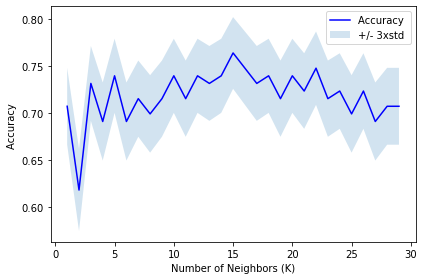

In [138]:
#plot accuracy vs k values
plt.plot(range(1,Kvals),mean_acc,'b')
plt.fill_between(range(1,Kvals),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.2)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier(n_neighbors = 15).fit(x_train,y_train)

yhat = neigh.predict(x_test)

knn_score = accuracy_score(y_test, yhat)*100

print("KNN Accuracy: ", knn_score)

KNN Accuracy:  76.42276422764228


## SVM

In [123]:
from sklearn import svm

clf = svm.SVC(kernel='linear').fit(x_train, y_train)

yhat = clf.predict(x_test)

yhat[0:5]

svm_score = accuracy_score(y_test, yhat) * 100

print("SVM Accuracy: ", svm_score)


SVM Accuracy:  78.86178861788618


## report result

In [124]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [140]:
knn_yhat = neigh.predict(x_test)
knn_score

76.42276422764228

## Jaccard 

In [153]:
# evaluate knn
knn_yhat = neigh.predict(x_test)
jc1 = (jaccard_score(y_test, knn_yhat)*100)

# evaluate Decision Trees
dt_yhat = decTree.predict(x_test)
jc2 = (jaccard_score(y_test, dt_yhat)*100)

#evaluate SVM
svm_yhat = clf.predict(x_test)
jc3 = (jaccard_score(y_test, svm_yhat) *100)

# evaluate Logistic Regression
lr_yhat = lr.predict(x_test)
jc4 = (jaccard_score(y_test, lr_yhat)*100)

jaccard_scores = [jc1, jc2, jc3, jc4]
jaccard_scores

[73.39449541284404, 61.61616161616161, 75.23809523809524, 75.23809523809524]

## F1 score

In [154]:
# evaluate KNN
fs1 = (f1_score(y_test, knn_yhat, average='weighted')*100)
# evaluate Desision Trees 
fs2 = (f1_score(y_test, dt_yhat,  average='weighted')*100)
# evaluate SVM
fs3 = (f1_score(y_test, svm_yhat, average='weighted')*100)
# evaluate Logistic Regression
fs4 = (f1_score(y_test, lr_yhat,  average='weighted')*100)

f1_scores = [fs1, fs2, fs3, fs4]
f1_scores

[72.23388190439968, 69.10569105691057, 76.14910090194871, 76.14910090194871]

In [150]:
LR_yhat_prob = lr.predict_proba(x_test)

list_ll = ['NA', 'NA', 'NA',(log_loss(y_test, LR_yhat_prob)) * 100]
list_ll

['NA', 'NA', 'NA', 50.907588647361365]

In [155]:
df = pd.DataFrame( jaccard_scores,index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=f1_scores)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,73.394495,72.233882,NA
Decision Tree,61.616162,69.105691,NA
SVM,75.238095,76.149101,NA
Logistic Regression,75.238095,76.149101,50.907589
